<a href="https://colab.research.google.com/github/psa2001/computer_vision/blob/main/2_task(progudin_gurskii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#загрузка изображения
#разделение на градиенты синего/зедёного/красного
#отделение по 5%

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path  
from skimage import io
import matplotlib.pyplot as plt
import imageio
import cv2 as cv
import nibabel as nib#???????????????????????????????????????????????????????
from scipy import misc
import glob
from matplotlib import image
from PIL import Image
from skimage.io import imread, imsave
from os.path import join
import pytest

In [ ]:
patient_path = os.path.join("public_test", "01" , "_test_img_input")
print(patient_path)

public_test/01/_test_img_input


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/progudin_gorskii

/content/drive/My Drive/progudin_gorskii


In [ ]:
def load_picture(dataset_directory):
  len = 20#поменять
  dataset = []
  for i in range(len):
    num = '0' + str(i)
    path_in_folder = dataset_directory + '/' + num[-2 :] + '_test_img_input/'
    cur = imread(join(path_in_folder, 'img.png'), plugin='matplotlib')
    print(path_in_folder)
    print(type(cur), cur.shape)
    dataset.append((cur))
  return dataset

In [ ]:
data_pic = load_picture('public_test')

public_test/00_test_img_input/
<class 'numpy.ndarray'> (1075, 419)
public_test/01_test_img_input/
<class 'numpy.ndarray'> (1024, 398)
public_test/02_test_img_input/
<class 'numpy.ndarray'> (1074, 409)
public_test/03_test_img_input/
<class 'numpy.ndarray'> (1166, 449)
public_test/04_test_img_input/
<class 'numpy.ndarray'> (1153, 445)
public_test/05_test_img_input/
<class 'numpy.ndarray'> (1159, 449)
public_test/06_test_img_input/
<class 'numpy.ndarray'> (1165, 452)
public_test/07_test_img_input/
<class 'numpy.ndarray'> (1064, 412)
public_test/08_test_img_input/
<class 'numpy.ndarray'> (1162, 449)
public_test/09_test_img_input/
<class 'numpy.ndarray'> (1155, 444)
public_test/10_test_img_input/
<class 'numpy.ndarray'> (9773, 3809)
public_test/11_test_img_input/
<class 'numpy.ndarray'> (9763, 3790)
public_test/12_test_img_input/
<class 'numpy.ndarray'> (9762, 3722)
public_test/13_test_img_input/
<class 'numpy.ndarray'> (9715, 3741)
public_test/14_test_img_input/
<class 'numpy.ndarray'> (96

In [ ]:
data_pic[0].shape
a = data_pic[0]
a.shape
type(a)

numpy.ndarray

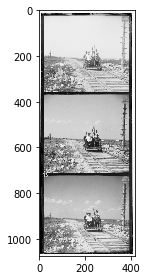

In [ ]:
io.imshow(a)
io.show()

In [ ]:
blue = []
red = []
green = []
a = data_pic[1]

if(a.shape[0] > a.shape[1]):
  step = a.shape[0] // 3
  blue.append(a[: step , :])
  green.append(a[step : 2 * step, :])
  red.append(a[2 * step : 3 * step, :])

blue = np.array(blue)[0,:,:]
green = np.array(green)[0,:,:]
red = np.array(red)[0,:,:]

#done


In [ ]:
chet = 0
for i in (blue, green, red):
  cut_row = np.uint32(i.shape[0] * 0.09)
  cut_column  = np.uint32(i.shape[1] * 0.09)
  if(chet == 1):
    blue = i[cut_row : -cut_row, cut_column : -cut_column]
  elif(chet == 2):
    green = i[cut_row : -cut_row, cut_column : -cut_column]
  else:
    red = i[cut_row : -cut_row, cut_column : -cut_column]
  chet += 1
  print(i.shape, cut_row, cut_column)

(341, 398) 30 35
(341, 398) 30 35
(341, 398) 30 35


In [ ]:
def MSE(pic1, pic2):
  res = 1 / (pic1.shape[0] * pic1.shape[1])
  dif = np.float64(pic1 - pic2) * np.float64(pic1 - pic2)
  mse_res = np.sum(dif) * res
  return mse_res

In [ ]:
#blue
#green
metric_min_bg = MSE(blue, green)
needed_row_bg = 0
needed_col_bg = 0
metric_min_gb = MSE(green, blue)
needed_row_gb = 0
needed_col_gb = 0
print(metric_min_bg, metric_min_gb)
for i in range(1,16):
  for j in range(1, 16):
    metric_bg = MSE(blue[i : , j : ], green[ : -i, : -j])
    if(metric_min_bg > metric_bg):
      needed_row_bg = i
      needed_col_bg = j
      metric_min_bg = metric_bg
    metric_gb = MSE(blue[ : -i, : -j], green[i : , j : ])
    if(metric_min_gb > metric_gb):
      needed_row_gb = i
      needed_col_gb = j
      metric_min_gb = metric_gb
print("BG", metric_min_bg, needed_row_bg, needed_col_bg)
print("GB", metric_min_gb, needed_row_gb, needed_col_gb)

0.06527429456613265 0.06527429456613265
BG 0.018884316474061257 8 1
GB 0.06163743756108777 14 1


In [ ]:
if(metric_min_bg < metric_min_gb):
  blue = blue[needed_row_bg : , needed_col_bg :]
  green = green[:-needed_row_bg, : -needed_col_bg]
  begin_row = needed_row_bg
  begin_col = needed_col_bg
else:
  blue = blue[needed_row_gb : , needed_col_gb :]
  green = green[:-needed_row_gb, : -needed_col_gb]
  begin_row = needed_row_gb
  begin_col = needed_col_gb
print(blue.shape)
print(green.shape)

(303, 362)
(303, 362)


In [ ]:
metr_red_fir = MSE(blue, red[begin_row : , begin_col :]) +  MSE(green, red[begin_row : , begin_col :])
metr_red_sec = MSE(blue, red[: -begin_row , : -begin_col]) +  MSE(green, red[: -begin_row, : -begin_col])
if(metr_red_fir < metr_red_sec):
  red = red[begin_row : , begin_col :]
else:
  red = red[: -begin_row , : -begin_col]
print(metr_red_fir, metr_red_sec)

0.06862190498939628 0.10075797001164627


In [ ]:
metric_min_br = MSE(blue, red) + MSE(green, red)
needed_row_br = 0
needed_col_br = 0
metric_min_rb = metric_min_br
needed_row_rb = 0
needed_col_rb = 0
for i in range(1,16):
  for j in range(1, 16):
    metric_br = MSE(blue[i:,j:], red[:-i,:-j]) + MSE(green[i:,j:], red[:-i,:-j])
    if(metric_min_br > metric_br):
      needed_row_br = i
      needed_col_br = j
      metric_min_br = metric_br
    metric_rb = MSE(blue[:-i,:-j], red[i:,j:]) + MSE(green[:-i,:-j], red[i:,j:])
    if(metric_min_rb > metric_rb):
      needed_row_rb = i
      needed_col_rb = j
      metric_min_rb = metric_rb
print("rb", metric_min_rb, needed_row_rb, needed_col_rb)
print("br", metric_min_br, needed_row_br, needed_col_br)

rb 0.05007390856502378 2 1
br 0.06862190498939628 0 0


In [ ]:
if(metric_min_rb < metric_min_br):
  red = red[:-needed_row_rb,:-needed_col_rb]
  blue = blue[needed_row_rb:,needed_col_rb:]
  green = green[needed_row_rb:,needed_col_rb:]
else:
  red = red[:-needed_row_br,:-needed_col_br]
  blue = blue[needed_row_br:,needed_col_br:]
  green = green[needed_row_br:,needed_col_br:]

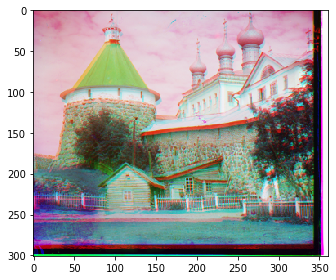

In [ ]:
picture = np.dstack((red, green, blue))
io.imshow(picture)
io.show()

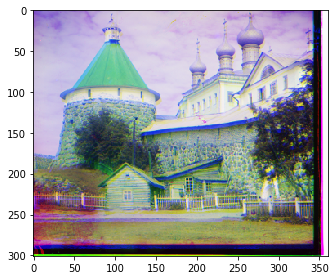

In [ ]:
picture = cv2.merge((blue,green,red))
io.imshow(picture)
io.show()

In [ ]:
picture.shape

(301, 361, 3)

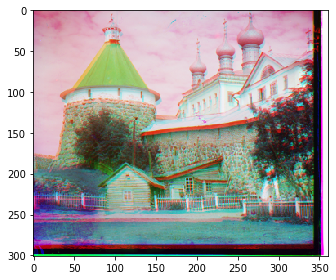

In [ ]:
picture = cv2.merge((red,green,blue))
io.imshow(picture)
io.show()

In [ ]:
coef = 0.05

In [ ]:
while(coef < 0.10):
  #final
  print(coef)
  for k in range(10):
    blue = []
    red = []
    green = []
    a = data_pic[k]

    if(a.shape[0] > a.shape[1]):
      step = a.shape[0] // 3
      blue.append(a[: step , :])
      green.append(a[step : 2 * step, :])
      red.append(a[2 * step : 3 * step, :])

    blue = np.array(blue)[0,:,:]
    green = np.array(green)[0,:,:]
    red = np.array(red)[0,:,:]


    cut_row = np.uint32(blue.shape[0] * coef)
    cut_column  = np.uint32(blue.shape[1] * coef)
    blue = blue[cut_row : blue.shape[0] - cut_row, cut_column : blue.shape[1] - cut_column]
    green = green[cut_row : green.shape[0] - cut_row, cut_column : green.shape[1] - cut_column]
    red = red[cut_row : red.shape[0] - cut_row, cut_column : red.shape[1] - cut_column]


    def MSE(pic1, pic2):
      res = 1 / (pic1.shape[0] * pic1.shape[1])
      dif = np.float64(pic1 - pic2) * np.float64(pic1 - pic2)
      mse_res = np.sum(dif) * res
      return mse_res




    metric_min_bg = MSE(blue, green)
    needed_row_bg = 0
    needed_col_bg = 0
    metric_min_gb = MSE(green, blue)
    needed_row_gb = 0
    needed_col_gb = 0
    for i in range(1,16):
      for j in range(1, 16):
        metric_bg = MSE(blue[i : , j : ], green[ : -i, : -j])
        if(metric_min_bg > metric_bg):
          needed_row_bg = i
          needed_col_bg = j
          metric_min_bg = metric_bg
        metric_gb = MSE(blue[ : -i, : -j], green[i : , j : ])
        if(metric_min_gb > metric_gb):
          needed_row_gb = i
          needed_col_gb = j
          metric_min_gb = metric_gb



    if(metric_min_bg < metric_min_gb):
      blue = blue[needed_row_bg : , needed_col_bg :]
      green = green[:-needed_row_bg, : -needed_col_bg]
      begin_row = needed_row_bg
      begin_col = needed_col_bg
    else:
      blue = blue[needed_row_gb : , needed_col_gb :]
      green = green[:-needed_row_gb, : -needed_col_gb]
      begin_row = needed_row_gb
      begin_col = needed_col_gb


    metr_red_fir = MSE(blue, red[begin_row : , begin_col :]) +  MSE(green, red[begin_row : , begin_col :])
    metr_red_sec = MSE(blue, red[: -begin_row , : -begin_col]) +  MSE(green, red[: -begin_row, : -begin_col])
    if(metr_red_fir < metr_red_sec):
      red = red[begin_row : , begin_col :]
    else:
      red = red[: -begin_row , : -begin_col]




    metric_min_br = MSE(blue, red) + MSE(green, red)
    needed_row_br = 0
    needed_col_br = 0
    metric_min_rb = metric_min_br
    needed_row_rb = 0
    needed_col_rb = 0
    for i in range(1,16):
      for j in range(1, 16):
        metric_br = MSE(blue[i:,j:], red[:-i,:-j]) + MSE(green[i:,j:], red[:-i,:-j])
        if(metric_min_br > metric_br):
          needed_row_br = i
          needed_col_br = j
          metric_min_br = metric_br
        metric_rb = MSE(blue[:-i,:-j], red[i:,j:]) + MSE(green[:-i,:-j], red[i:,j:])
        if(metric_min_rb > metric_rb):
          needed_row_rb = i
          needed_col_rb = j
          metric_min_rb = metric_rb




    if(metric_min_rb < metric_min_br and needed_row_rb!=0 and needed_col_rb!=0):
      red = red[:-needed_row_rb,:-needed_col_rb]
      blue = blue[needed_row_rb:,needed_col_rb:]
      green = green[needed_row_rb:,needed_col_rb:]
    elif(metric_min_rb >= metric_min_br and needed_row_br!=0 and needed_col_br!=0):
      red = red[:-needed_row_br,:-needed_col_br]
      blue = blue[needed_row_br:,needed_col_br:]
      green = green[needed_row_br:,needed_col_br:]


    picture = np.dstack((red, green, blue))
    io.imshow(picture)
    io.show()
  coef = coef +  0.01

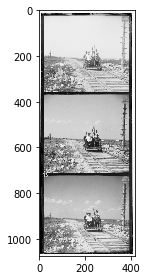

#МММ(Пирамида)


In [ ]:
blue = []
red = []
green = []
a = data_pic[10]

if(a.shape[0] > a.shape[1]):
  step = a.shape[0] // 3
  blue.append(a[: step , :])
  green.append(a[step : 2 * step, :])
  red.append(a[2 * step : 3 * step, :])

blue = np.array(blue)[0,:,:]
green = np.array(green)[0,:,:]
red = np.array(red)[0,:,:]

coef = 0.1
cut_row = np.uint32(blue.shape[0] * coef)
cut_column  = np.uint32(blue.shape[1] * coef)
blue = blue[cut_row : blue.shape[0] - cut_row, cut_column : blue.shape[1] - cut_column]
green = green[cut_row : green.shape[0] - cut_row, cut_column : green.shape[1] - cut_column]
red = red[cut_row : red.shape[0] - cut_row, cut_column : red.shape[1] - cut_column]

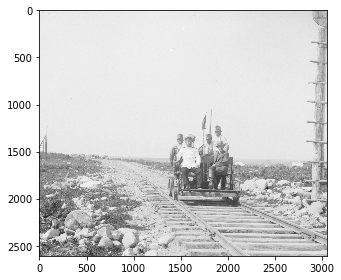

In [ ]:
io.imshow(blue)
io.show()

In [ ]:
blue_low_1 = cv.pyrDown(blue)
blue_low_2 = cv.pyrDown(blue_low_1)
blue_low_3 = cv.pyrDown(blue_low_2)

green_low_1 = cv.pyrDown(green)
green_low_2 = cv.pyrDown(green_low_1)
green_low_3 = cv.pyrDown(green_low_2)

In [ ]:
print(blue_low_3.shape, green_low_3.shape)

(321, 379) (321, 379)


In [ ]:
metric_min_bg = MSE(blue_low_3, green_low_3)
needed_row_bg = 0
needed_col_bg = 0
metric_min_gb = metric_min_bg
needed_row_gb = 0
needed_col_gb = 0
for i in range(1,16):
  for j in range(1, 16):
    metric_bg = MSE(blue_low_3[i : , j : ], green_low_3[ : -i, : -j])
    if(metric_min_bg > metric_bg):
      needed_row_bg = i
      needed_col_bg = j
      metric_min_bg = metric_bg
    metric_gb = MSE(blue_low_3[ : -i, : -j], green_low_3[i : , j : ])
    if(metric_min_gb > metric_gb):
      needed_row_gb = i
      needed_col_gb = j
      metric_min_gb = metric_gb



if(metric_min_bg < metric_min_gb):
  blue = blue[8 * needed_row_bg : , 8 * needed_col_bg :]
  green = green[:green.shape[0]-8 * needed_row_bg, : green.shape[1]-8 * needed_col_bg]
  begin_row = 8 * needed_row_bg
  begin_col = 8 * needed_col_bg
else:
  blue = blue[8 * needed_row_gb : , 8 * needed_col_gb :]
  green = green[: green.shape[0] - 8 * needed_row_gb, : green.shape[1] - 8 * needed_col_gb]
  begin_row = 8 * needed_row_gb
  begin_col = 8 * needed_col_gb





In [ ]:
metr_red_fir = MSE(blue, red[begin_row : , begin_col :]) +  MSE(green, red[begin_row : , begin_col :])
metr_red_sec = MSE(blue, red[: -begin_row , : -begin_col]) +  MSE(green, red[: -begin_row, : -begin_col])
if(metr_red_fir < metr_red_sec):
  red = red[begin_row : , begin_col :]
else:
  red = red[: red.shape[0] - begin_row , : red.shape[1] - begin_col]

In [ ]:
for i in (blue, green , red):
  print(i.shape)

(2559, 2993)
(2559, 2993)
(2559, 2993)


In [ ]:
blue_low_1 = cv.pyrDown(blue)
blue_low_2 = cv.pyrDown(blue_low_1)
blue_low_3 = cv.pyrDown(blue_low_2)

green_low_1 = cv.pyrDown(green)
green_low_2 = cv.pyrDown(green_low_1)
green_low_3 = cv.pyrDown(green_low_2)

red_low_1 = cv.pyrDown(red)
red_low_2 = cv.pyrDown(red_low_1)
red_low_3 = cv.pyrDown(red_low_2)

In [ ]:
c = np.array((1,1))
a = np.array((2,2))
a + c

array([3, 3])

In [ ]:
blue_low_1[c]


0.59839153

In [ ]:
def MSE(pic1, pic2):
      import numpy as np
      res = 1 / (pic1.shape[0] * pic1.shape[1])
      dif = np.float64(pic1 - pic2) * np.float64(pic1 - pic2)
      mse_res = np.sum(dif) * res
      return mse_res
 
 
 
def cross_corel(pic1, pic2):
      import numpy as np
      chis = np.sum(pic1 * pic2)
      znam = np.sqrt(np.sum(pic1*pic1) * np.sum(pic2*pic2))
      return chis/znam
 

def work_with_scaling(b_coord, r_coord, blue, green, red, cycle, scale):
    import numpy as np
    from skimage.transform import pyramid_gaussian, pyramid_reduce

    blue_low_3 = np.array(pyramid_reduce(blue, downscale = scale))
    green_low_3 = np.array(pyramid_reduce(green, downscale = scale))
 
    metric_min_bg = MSE(blue_low_3, green_low_3)
    needed_row_bg = 0
    needed_col_bg = 0
    metric_min_gb = metric_min_bg
    needed_row_gb = 0
    needed_col_gb = 0
 
    for i in range(0,cycle + 1):
      for j in range(0, cycle + 1):
        metric_bg = MSE(blue_low_3[i : , j : ], green_low_3[ : green_low_3.shape[0]-i, : green_low_3.shape[1]-j])
        if(metric_min_bg > metric_bg):
          needed_row_bg = i
          needed_col_bg = j
          metric_min_bg = metric_bg
        metric_gb = MSE(blue_low_3[ : blue_low_3.shape[0] - i, : blue_low_3.shape[1] - j], green_low_3[i : , j : ])
        if(metric_min_gb > metric_gb):
          needed_row_gb = i
          needed_col_gb = j
          metric_min_gb = metric_gb
 
  
    if(metric_min_bg < metric_min_gb):
      blue = blue[scale * needed_row_bg : , scale * needed_col_bg :]
      green = green[:green.shape[0] - scale * needed_row_bg, : green.shape[1] - scale * needed_col_bg]
      red = red[:red.shape[0] - scale * needed_row_bg, : red.shape[1] - scale * needed_col_bg]
      b_coord = b_coord + (scale * needed_row_bg, scale * needed_col_bg)
      begin_row = scale * needed_row_bg
      begin_col = scale * needed_col_bg
    else:
      blue = blue[ : blue.shape[0] - scale * needed_row_gb , : blue.shape[1] - scale * needed_col_gb]
      green = green[scale * needed_row_gb : ,scale * needed_col_gb : ]
      red = red[scale * needed_row_gb : ,scale * needed_col_gb : ]
      b_coord = b_coord - (scale * needed_row_gb, scale * needed_col_gb)
      begin_row = scale * needed_row_gb
      begin_col = scale * needed_col_gb
 
 
 
    blue_low_3 = np.array(pyramid_reduce(blue, downscale = scale))
    green_low_3 = np.array(pyramid_reduce(green, downscale = scale))
    red_low_3 = np.array(pyramid_reduce(red, downscale = scale))
 
    metric_min_br = MSE(green_low_3, red_low_3)
    needed_row_br = 0
    needed_col_br = 0
    metric_min_rb = metric_min_br
    needed_row_rb = 0
    needed_col_rb = 0
    for i in range(0,cycle + 1):
      for j in range(0, cycle + 1):
        metric_br = MSE(green_low_3[i:,j:], red_low_3[:red_low_3.shape[0]-i,:red_low_3.shape[1]-j])
        if(metric_min_br > metric_br):
          needed_row_br = i
          needed_col_br = j
          metric_min_br = metric_br
        metric_rb = MSE(green_low_3[:green_low_3.shape[0]-i,:green_low_3.shape[1]-j], red_low_3[i:,j:])
        if(metric_min_rb > metric_rb):
          needed_row_rb = i
          needed_col_rb = j
          metric_min_rb = metric_rb
 
        #метка

    if(metric_min_rb < metric_min_br):
      red = red[scale * needed_row_rb : , scale * needed_col_rb : ]
      r_coord = r_coord + (scale * needed_row_rb, scale * needed_col_rb)
      blue = blue[ : blue.shape[0]-scale * needed_row_rb, : blue.shape[1]-scale * needed_col_rb]
      green = green[ : green.shape[0]-scale * needed_row_rb, : green.shape[1]-scale * needed_col_rb]
    elif(metric_min_rb >= metric_min_br):
      red = red[ : red.shape[0]-scale * needed_row_br, : red.shape[1]-scale * needed_col_br]
      r_coord = r_coord - (scale * needed_row_br, scale * needed_col_br)
      blue = blue[scale * needed_row_br:, scale * needed_col_br:]
      green = green[scale * needed_row_br : , scale * needed_col_br :]



    return blue, green, red, b_coord, r_coord

#g_coord = (508,237)
def align(data_pic, g_coord):
#for k in range(20):
  import os
  import numpy as np
  import matplotlib.pyplot as plt
  from skimage import io
  import imageio
  from skimage.transform import pyramid_gaussian, pyramid_reduce
  blue = []
  red = []
  green = []
  a = data_pic
  r_coord = b_coord = np.int64(np.array(g_coord))
  step = a.shape[0] // 3
  if(a.shape[0] > a.shape[1]):
    blue.append(a[: step , :])
    green.append(a[step : 2 * step, :])
    red.append(a[2 * step : 3 * step, :])
 
  blue = np.array(blue)[0,:,:]
  green = np.array(green)[0,:,:]
  red = np.array(red)[0,:,:]
  b_coord = b_coord - (step, 0)
  r_coord = r_coord + (step,0)
 
  coef = 0.12
  print("cycles_")
  cut_row = np.uint32(blue.shape[0] * coef)
  cut_column  = np.uint32(blue.shape[1] * coef)
  blue = blue[cut_row : blue.shape[0] - cut_row, cut_column : blue.shape[1] - cut_column]
  green = green[cut_row : green.shape[0] - cut_row, cut_column : green.shape[1] - cut_column]
  red = red[cut_row : red.shape[0] - cut_row, cut_column : red.shape[1] - cut_column]
 
 
  if(blue.shape[0] > 900 or blue.shape[1]> 900):

    #blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 2, 64)

    #blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 4, 32)

    #blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 8, 16)

    blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 16, 8)

    blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 25, 6)

    blue, green, red, b_coord, r_coord = work_with_scaling(b_coord, r_coord, blue, green, red, 35, 4)


    picture = np.dstack((red, green, blue))
    io.imshow(picture)
    io.show()
    return (picture),(b_coord), (r_coord)

 
 
 
  else:
    metric_min_bg = MSE(blue, green)
    needed_row_bg = 0
    needed_col_bg = 0
    metric_min_gb = MSE(green, blue)
    needed_row_gb = 0
    needed_col_gb = 0
    for i in range(1,16):
      for j in range(1, 16):
        metric_bg = MSE(blue[i : , j : ], green[ : -i, : -j])
        if(metric_min_bg > metric_bg):
          needed_row_bg = i
          needed_col_bg = j
          metric_min_bg = metric_bg
        metric_gb = MSE(blue[ : -i, : -j], green[i : , j : ])
        if(metric_min_gb > metric_gb):
          needed_row_gb = i
          needed_col_gb = j
          metric_min_gb = metric_gb
 
 
    if(metric_min_bg < metric_min_gb):
      blue = blue[needed_row_bg : , needed_col_bg :]
      b_coord = b_coord + (needed_row_bg, needed_col_bg)
      green = green[ : -needed_row_bg, : -needed_col_bg]
      red = red[ : -needed_row_bg, : -needed_col_bg]
      begin_row = needed_row_bg
      begin_col = needed_col_bg
    else:
      blue = blue[ : -needed_row_gb , : -needed_col_gb]
      green = green[needed_row_gb : , needed_col_gb :]
      red = red[needed_row_gb : , needed_col_gb :]
      b_coord = b_coord - (needed_row_gb, needed_col_gb)
      begin_row = needed_row_gb
      begin_col = needed_col_gb
 
 
 
 
 
    metric_min_br = metric_min_rb = MSE(blue, red) + MSE(green, red)
    needed_row_br = needed_col_br = needed_row_rb = needed_col_rb = 0
    for i in range(1,16):
      for j in range(1, 16):
        metric_br = MSE(blue[i:,j:], red[:-i,:-j]) + MSE(green[i:,j:], red[:-i,:-j])
        if(metric_min_br > metric_br):
          needed_row_br = i
          needed_col_br = j
          metric_min_br = metric_br
        metric_rb = MSE(blue[:-i,:-j], red[i:,j:]) + MSE(green[:-i,:-j], red[i:,j:])
        if(metric_min_rb > metric_rb):
          needed_row_rb = i
          needed_col_rb = j
          metric_min_rb = metric_rb
 
    print(metric_min_rb, needed_row_rb, needed_col_rb)
    print(metric_min_br, needed_row_br, needed_col_br)
    if(metric_min_rb < metric_min_br and needed_row_rb!=0 and needed_col_rb!=0):
      red = red[needed_row_rb : , needed_col_rb :]
      r_coord = r_coord + (needed_row_rb, needed_col_rb)
      blue = blue[ : -needed_row_rb:, : -needed_col_rb]
      green = green[ : -needed_row_rb, : -needed_col_rb]
    elif(metric_min_rb >= metric_min_br and needed_row_br!=0 and needed_col_br!=0):
      red = red[ : -needed_row_br, : -needed_col_br]
      blue = blue[needed_row_br : ,needed_col_br : ]
      r_coord = r_coord - (needed_row_br, needed_col_br)
      green = green[needed_row_br : , needed_col_br : ]
 
    print ((b_coord), (r_coord))
    picture = np.dstack((red, green, blue))
    #io.imshow(picture)
    #io.show()
    return (picture),(b_coord), (r_coord)

cycles_


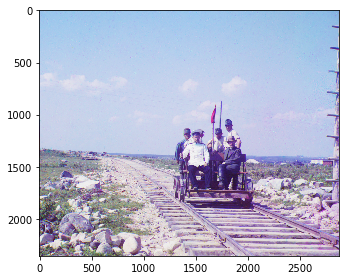

In [ ]:
for k in range(10, 11):
  align(data_pic[k], (1,1))

In [ ]:
!ls -l

total 1587
-rw-------  1 root root 1168662 Sep 20 10:29 2_task.ipynb
-rw-------  1 root root    8291 Sep 18 21:40 align_0.py
-rw-------  1 root root    7611 Sep 19 09:10 align_16_from_20.py
-rw-------  1 root root    9071 Sep 18 21:51 align_2OK.py
-rw-------  1 root root    8070 Sep 19 19:14 align_8.5.py
-rw-------  1 root root    8374 Sep 20 09:42 align.py
-rwx------  1 root root     686 Sep 17 07:57 build.sh
-rw-------  1 root root  395110 Sep 17 07:57 description.pdf
drwx------  2 root root    4096 Sep 18 18:17 my_answ
drwx------ 62 root root    4096 Sep 20 09:46 public_test
drwx------  2 root root    4096 Sep 20 09:43 __pycache__
-rwx------  1 root root    4736 Sep 19 08:13 run.py


In [ ]:
!ls

2_task.ipynb	     align_2OK.py  build.sh	    public_test
align_0.py	     align_8.5.py  description.pdf  __pycache__
align_16_from_20.py  align.py	   my_answ	    run.py


In [ ]:
!chmod +x run.py

In [ ]:
!chmod +x build.sh

In [ ]:
!./build.sh

In [ ]:
!./run.py public_test

cycles_last_hope
0.07349096777865247 0 0
0.051486081515737026 9 1
[153 238] [857 236]
153 238 857 236
153 236 858 238 5 5
00 2.54s Ok
cycles_last_hope
0.07429947000684145 0 0
0.030231496495056794 7 1
[ 48 135] [720 133]
48 135 720 133
47 135 719 133 5 2
01 0.82s Ok
cycles_last_hope
0.0673185604204859 0 0
0.05246901840771124 7 1
[ 90 249] [794 246]
90 249 794 246
90 250 794 246 5 1
02 0.86s Ok
cycles_last_hope
0.07195574082565234 0 0
0.03437092110456777 5 3
[240 150] [1006  146]
240 150 1006 146
240 149 1006 146 5 1
03 1.03s Ok
cycles_last_hope
0.1307771822816707 0 0
0.09481340753532366 3 1
[104 234] [871 234]
104 234 871 234
103 236 871 234 5 3
04 0.95s Ok
cycles_last_hope
0.07518007415012576 0 0
0.04593818862485455 5 2
[111 240] [875 236]
111 240 875 236
110 241 875 236 5 2
05 0.98s Ok
cycles_last_hope
0.0796860581269447 0 0
0.03456319971439998 7 2
[175 235] [939 230]
175 235 939 230
175 235 939 229 5 1
06 1.01s Ok
cycles_last_hope
0.14484615773275317 0 0
0.11379198915037854 8 1
[134 

In [ ]:
!./run.py -check_test -public_test

Usage: ./run.py tests_dir
